In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import sys
import scipy.stats as stats
import numpy as np
import pickle

In [2]:
CO2 = pd.read_csv('./../co2_temp_data/deseasonal_co2_month.csv', index_col='Date')
CO2.head()

,CO2
Date,
1959.0411,315.27
1959.1260,315.34
1959.2027,315.41
1959.2877,315.48
1959.3699,315.55


In [3]:
filedir = './../Output/output_raw/output_all/JENA_s76_all/spatial.pik'
JENA_s76 = pickle.load(open(filedir, 'rb'))

In [4]:
CO2.loc[1976.0410:].index

Float64Index([1976.0410000000002,          1976.1257,          1976.2049,
                       1976.2896,          1976.3716,          1976.4563,
                       1976.5383, 1976.6229999999998,          1976.7077,
                       1976.7896,
              ...
                       2017.2027,          2017.2877,          2017.3699,
                       2017.4548,           2017.537,          2017.6219,
                       2017.7068,           2017.789,           2017.874,
                       2017.9562],
             dtype='float64', name='Date', length=504)

In [28]:
land = pd.DataFrame({"Date": CO2.loc[1976.0410:].index, 
                      "CO2": CO2.loc[1976.0410:].CO2.values,
                      "land": JENA_s76.Earth_Land.values})
land.set_index("Date", inplace=True)
land.head()

,CO2,land
Date,,
1976.0410,330.14,0.297948
1976.1257,330.21,0.202695
1976.2049,330.27,0.336327
1976.2896,330.34,0.243702
1976.3716,330.41,-0.437604


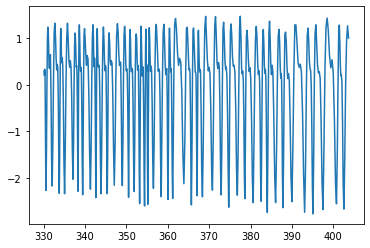

In [29]:
plt.plot(land.CO2, land.land)

In [30]:
land_reg = stats.linregress(land.index, land.land)

In [31]:
y_land = land_reg[0]*land.index + land_reg[1]

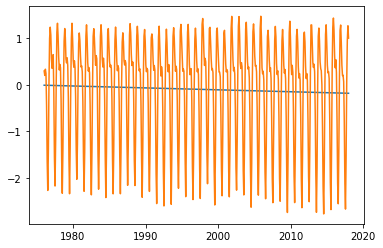

In [32]:
plt.plot(land.index, y_land)
plt.plot(land.index, land.land)

In [33]:
(land.land)/y_land

Date
1976.0410    -40.053280
1976.1257    -26.027237
1976.2049    -41.449401
1976.2896    -28.795643
1976.3716     49.721812
1976.4563    180.314965
1976.5383    238.669140
1976.6230    139.184582
1976.7077    -10.838787
1976.7896    -94.905947
1976.8743   -113.845849
1976.9563    -95.569142
1977.0411    -48.524141
1977.1260    -29.940030
1977.2027    -47.709096
1977.2877    -51.602620
1977.3699     13.418154
1977.4548    117.624110
1977.5370    159.540485
1977.6219     85.707721
1977.7068     -9.938417
1977.7890    -77.312500
1977.8740    -88.156830
1977.9562    -68.879748
1978.0411    -37.694176
1978.1260    -19.915373
1978.2027    -26.814893
1978.2877    -22.019148
1978.3699     18.469738
1978.4548     94.140429
                ...    
2015.5370     15.723176
2015.6219      8.043326
2015.7068     -2.187846
2015.7890     -7.241196
2015.8740     -8.353151
2015.9562     -6.818552
2016.0410     -3.601720
2016.1257     -2.122739
2016.2049     -3.122236
2016.2896     -1.510440
2016.3716  

In [34]:
t=range(0,len(land)+0,12)
np.mean(land.iloc[t].land)

0.5079805407288565

In [35]:
list_of_means = []
for i in range(12):
    indices = range(i,len(land)+i,12)
    land_sub = land.iloc[indices].land
    list_of_means.append(np.mean(land_sub))
list_of_means

[0.5079805407288565,
 0.30775465507593525,
 0.40016969158959753,
 0.28152665840473867,
 -0.478100150413757,
 -1.7739897487100964,
 -2.420970735194074,
 -1.4003912287541778,
 0.12616383510908752,
 1.076572801809027,
 1.2637853256532479,
 0.9840002016939967]

In [36]:
s = []
for i in range(42):
    for j in list_of_means:
        s.append(j)
s = np.array(s); s

array([ 0.50798054,  0.30775466,  0.40016969,  0.28152666, -0.47810015,
       -1.77398975, -2.42097074, -1.40039123,  0.12616384,  1.0765728 ,
        1.26378533,  0.9840002 ,  0.50798054,  0.30775466,  0.40016969,
        0.28152666, -0.47810015, -1.77398975, -2.42097074, -1.40039123,
        0.12616384,  1.0765728 ,  1.26378533,  0.9840002 ,  0.50798054,
        0.30775466,  0.40016969,  0.28152666, -0.47810015, -1.77398975,
       -2.42097074, -1.40039123,  0.12616384,  1.0765728 ,  1.26378533,
        0.9840002 ,  0.50798054,  0.30775466,  0.40016969,  0.28152666,
       -0.47810015, -1.77398975, -2.42097074, -1.40039123,  0.12616384,
        1.0765728 ,  1.26378533,  0.9840002 ,  0.50798054,  0.30775466,
        0.40016969,  0.28152666, -0.47810015, -1.77398975, -2.42097074,
       -1.40039123,  0.12616384,  1.0765728 ,  1.26378533,  0.9840002 ,
        0.50798054,  0.30775466,  0.40016969,  0.28152666, -0.47810015,
       -1.77398975, -2.42097074, -1.40039123,  0.12616384,  1.07

In [37]:
whole_mean=np.mean(s); whole_mean

-0.09379151275063487

In [38]:
s-whole_mean

array([ 0.60177205,  0.40154617,  0.4939612 ,  0.37531817, -0.38430864,
       -1.68019824, -2.32717922, -1.30659972,  0.21995535,  1.17036431,
        1.35757684,  1.07779171,  0.60177205,  0.40154617,  0.4939612 ,
        0.37531817, -0.38430864, -1.68019824, -2.32717922, -1.30659972,
        0.21995535,  1.17036431,  1.35757684,  1.07779171,  0.60177205,
        0.40154617,  0.4939612 ,  0.37531817, -0.38430864, -1.68019824,
       -2.32717922, -1.30659972,  0.21995535,  1.17036431,  1.35757684,
        1.07779171,  0.60177205,  0.40154617,  0.4939612 ,  0.37531817,
       -0.38430864, -1.68019824, -2.32717922, -1.30659972,  0.21995535,
        1.17036431,  1.35757684,  1.07779171,  0.60177205,  0.40154617,
        0.4939612 ,  0.37531817, -0.38430864, -1.68019824, -2.32717922,
       -1.30659972,  0.21995535,  1.17036431,  1.35757684,  1.07779171,
        0.60177205,  0.40154617,  0.4939612 ,  0.37531817, -0.38430864,
       -1.68019824, -2.32717922, -1.30659972,  0.21995535,  1.17

In [39]:
d_land = land.land.values - (s-whole_mean)
d_land

array([-3.03823988e-01, -1.98851111e-01, -1.57634357e-01, -1.31615845e-01,
       -5.32956870e-02,  3.03044671e-02,  6.26978062e-02, -6.25540768e-02,
       -1.09551715e-01, -1.71626197e-01, -1.19791997e-01, -6.42816277e-03,
       -4.08439295e-02, -4.49720608e-02,  8.93139050e-02,  2.73631570e-01,
        2.11018306e-01,  1.19978647e-01,  1.56923725e-01,  1.10719785e-01,
       -7.78077923e-02, -3.83896203e-02, -3.59475839e-02, -2.18302299e-02,
       -1.07144235e-02, -8.22991599e-02, -5.56388560e-02, -7.67600097e-03,
        6.96731937e-02,  4.35646980e-02,  1.18532023e-03, -8.47327775e-02,
       -1.58494778e-01, -2.28786024e-01, -1.48760086e-01, -6.20279123e-02,
       -4.71050744e-02,  7.09910205e-02,  8.68774336e-02,  4.22824976e-02,
        1.11849292e-01,  8.49209674e-02, -8.49886184e-03, -2.53278972e-02,
       -2.01069020e-01, -1.72220244e-01, -3.55402039e-02, -9.32361704e-02,
       -7.53722814e-02, -2.18227289e-02,  2.24752093e-02, -7.43756109e-03,
        1.33017935e-01,  

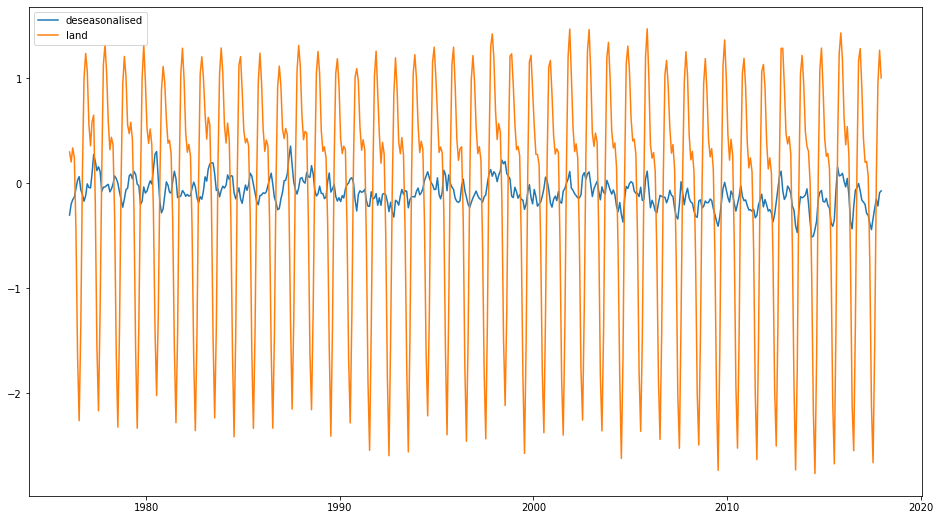

In [40]:
plt.figure(figsize=(16,9))
plt.plot(land.index, d_land, label='deseasonalised')
plt.plot(land.index, land.land.values, label='land')
plt.legend()

LinregressResult(slope=-0.004466169942515859, intercept=-1.3096976630502799e-05, rvalue=-0.4140617644875534, pvalue=2.682947877299108e-22, stderr=0.00043820604717056006)

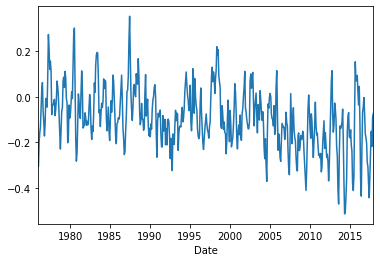

In [52]:
des["land"].plot()
stats.linregress(des.index-1976, des["land"])

## Rolling trend analysis

In [41]:
des = CO2.copy().loc[1976.0410:]
des["land"] = d_land
des.head()

,CO2,land
Date,,
1976.0410,330.14,-0.303824
1976.1257,330.21,-0.198851
1976.2049,330.27,-0.157634
1976.2896,330.34,-0.131616
1976.3716,330.41,-0.053296


In [44]:
def rolling_trend(data, sink='land', window=10, r_plot=False):
    
    data = data[['CO2', sink]]
    
    roll_values = []
    r_values = []
    
    for i in range(0,data.shape[0]-window):
        df = data.iloc[i:i+window+1]
        stats_info = stats.linregress(df['CO2'], df[sink])
        roll_values.append(stats_info[0])
        r_values.append(stats_info[2])
        
    data.plot(x='CO2', y=sink)
    plt.ylabel('C flux to the atmosphere (GtC)')
    
    roll_df = pd.DataFrame({f'{window}-month trend slope': roll_values}, index=data.index[:-window])
    roll_df.plot(color='g')
    plt.ylabel('Slope of C flux trend (GtC/ppm/yr)')
    
    if r_plot:
        r_df = pd.DataFrame({'r-values of trends': r_values}, index=data.index[:-window])
        r_df.plot(color='k')
        plt.ylabel('r-value of slope')
        return roll_df, r_df
    
    return roll_df

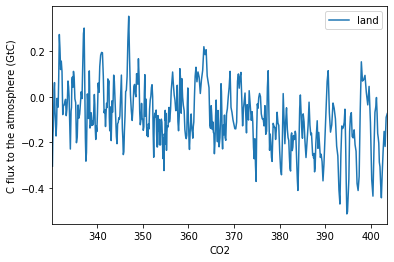

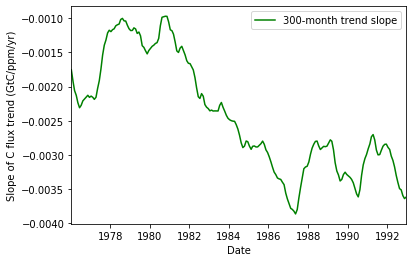

In [45]:
rolling_trend(des, window=25*12);

## 13-point smoothing

In [46]:
land_smooth = []
for i in range(land.land.values[6:-6].size):
    subset = land.land.values[i:i+13]
    mean = np.mean(subset)
    land_smooth.append(mean)

land_smooth = np.array(land_smooth)

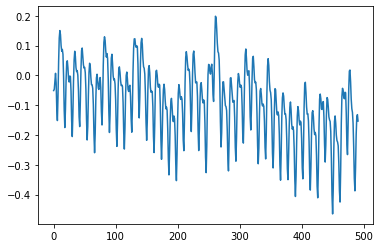

In [47]:
plt.plot(land_smooth)

In [48]:
smooth = CO2.copy().loc[1976.5383:2017.4548]
smooth["land"] = land_smooth
smooth.head()

,CO2,land
Date,,
1976.5383,330.59,-0.050865
1976.6230,330.70,-0.046355
1976.7077,330.82,-0.017080
1976.7896,330.93,0.006968
1976.8743,331.05,-0.025108


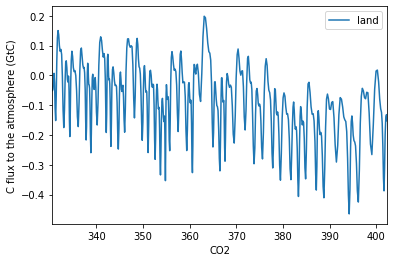

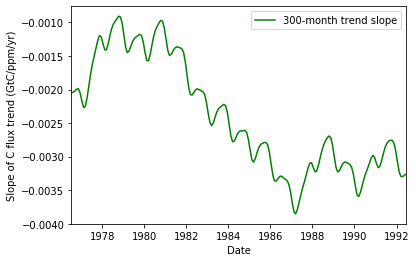

In [49]:
rolling_trend(smooth, window=25*12);